In [1]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd

# Load dataset (replace path with your dataset location)
df = pd.read_csv("Zomato data .csv")

# See first few rows
print(df.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
# Convert 'rate' column (e.g., "4.1/5") to numeric
df['rate'] = df['rate'].str.replace('/5', '').astype(float)

# Check data types & null values
print(df.info())
print(df.isnull().sum())

# Drop nulls if required
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


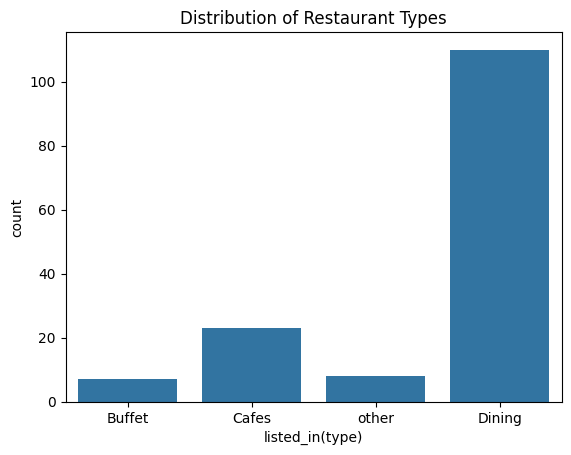

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="listed_in(type)", data=df)
plt.title("Distribution of Restaurant Types")
plt.show()


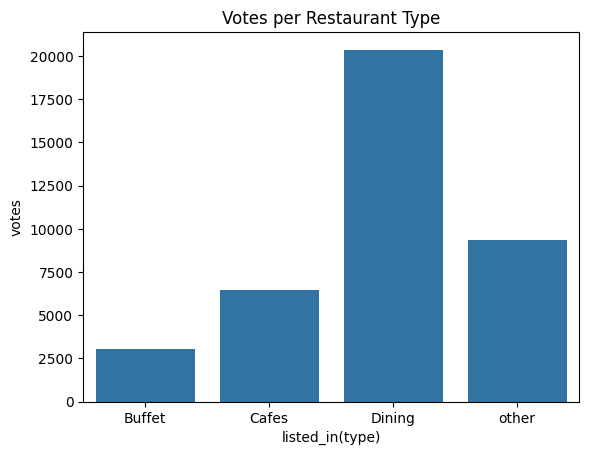

In [6]:
votes = df.groupby("listed_in(type)")["votes"].sum().reset_index()

sns.barplot(x="listed_in(type)", y="votes", data=votes)
plt.title("Votes per Restaurant Type")
plt.show()


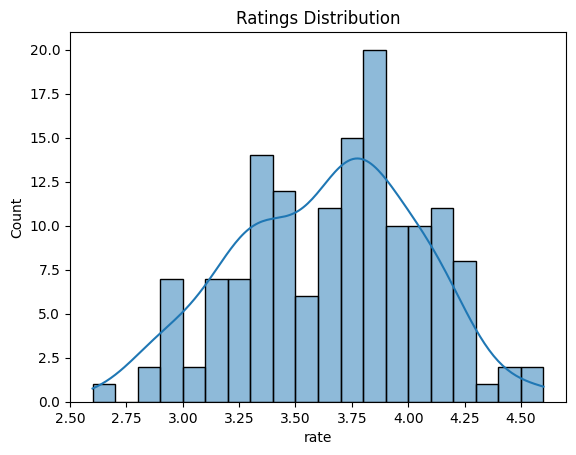

In [7]:
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Ratings Distribution")
plt.show()


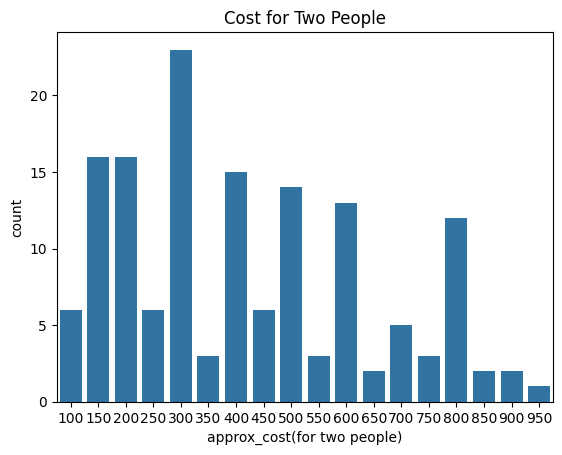

In [8]:
sns.countplot(x="approx_cost(for two people)", data=df)
plt.title("Cost for Two People")
plt.show()


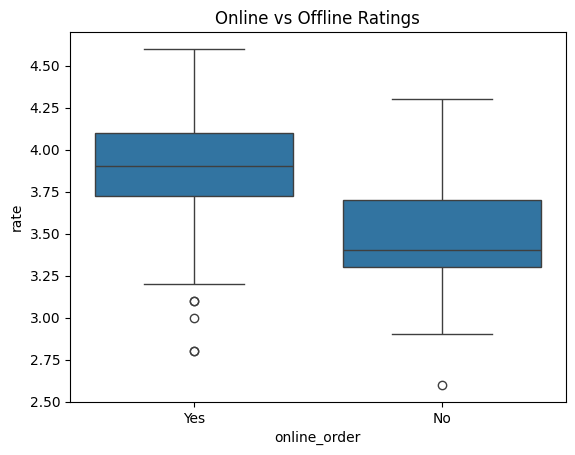

In [9]:
sns.boxplot(x="online_order", y="rate", data=df)
plt.title("Online vs Offline Ratings")
plt.show()


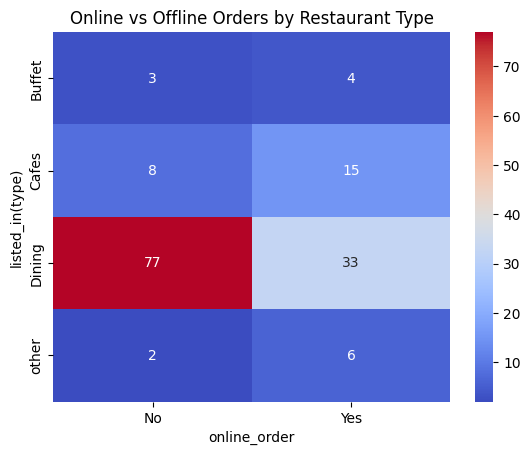

In [10]:
pivot = pd.pivot_table(df, index="listed_in(type)", columns="online_order", 
                       values="name", aggfunc="count")

sns.heatmap(pivot, annot=True, fmt="d", cmap="coolwarm")
plt.title("Online vs Offline Orders by Restaurant Type")
plt.show()


In [11]:
avg_cost_online = df[df['online_order']=="Yes"]["approx_cost(for two people)"].mean()
